In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('/content/drive/My Drive/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
s=data.corr()
s['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


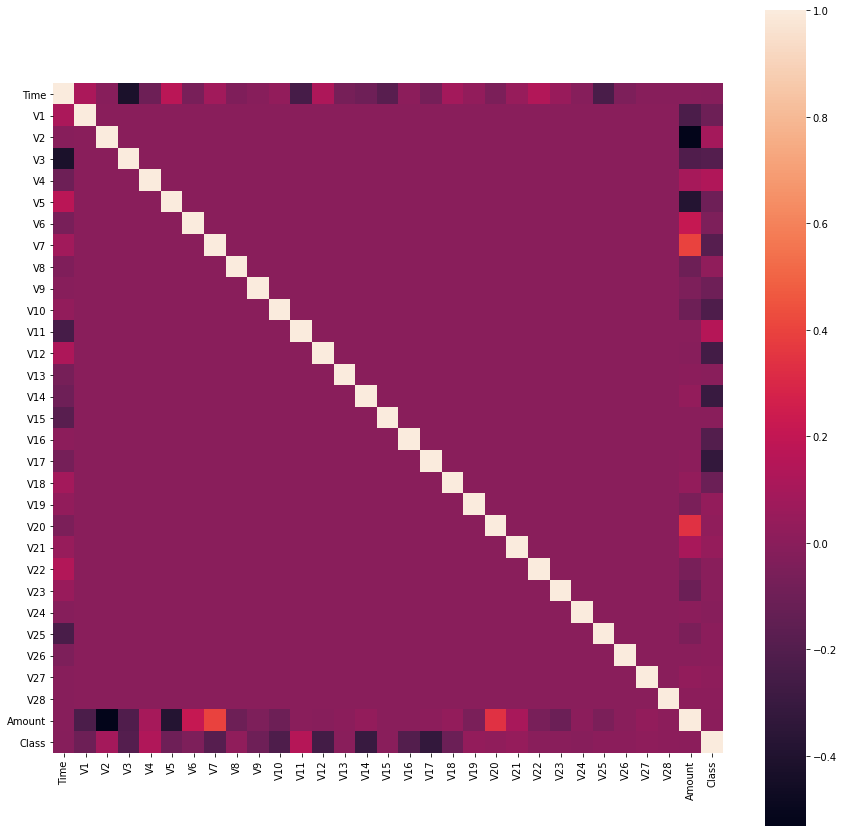

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(s, vmax=1, square=True);
plt.show()

In [5]:
data.isnull().values.any()

False

In [6]:
fraud=data[data['Class']==1]
fraud.shape


(492, 31)

In [7]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,2.678605,4.654458,1.104518,4.278940,1.049915,3.865035,6.970618,2.899366,1.539853,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-1.702228,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,1.973397,-8.688177,-0.979117,-9.692723,-0.643539,-6.562915,-11.945057,-4.664576,-0.299423,-0.171760,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,3.586218,-5.502530,-0.065566,-6.729720,-0.057227,-3.549795,-5.302949,-1.664346,0.646807,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,5.307078,-2.974088,0.672964,-4.282821,0.609189,-1.226043,-1.341940,0.091772,1.649318,0.822445,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,12.018913,1.375941,2.815440,3.442422,2.471358,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [8]:
normal=data[data['Class']==0]
normal.shape


(284315, 31)

In [9]:
normal.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,1.044204,1.003112,0.945939,0.995067,0.897007,0.915060,0.844772,0.749457,0.824919,0.811733,0.769404,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,-4.797473,-15.144988,-5.791881,-18.392091,-4.391307,-10.115560,-17.098444,-5.366660,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,-0.532880,-0.763447,-0.402102,-0.648067,-0.422453,-0.582812,-0.465543,-0.482644,-0.497414,-0.456366,-0.211764,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,-0.091872,-0.034923,0.141679,-0.013547,0.051947,0.048294,0.067377,-0.064833,-0.002787,0.003117,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,0.455135,0.736362,0.619207,0.662492,0.494104,0.648842,0.523738,0.399922,0.501103,0.457499,0.132401,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,10.002190,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [10]:
print('% of fraud is',(len(fraud)/float(len(normal))))

% of fraud is 0.0017304750013189597


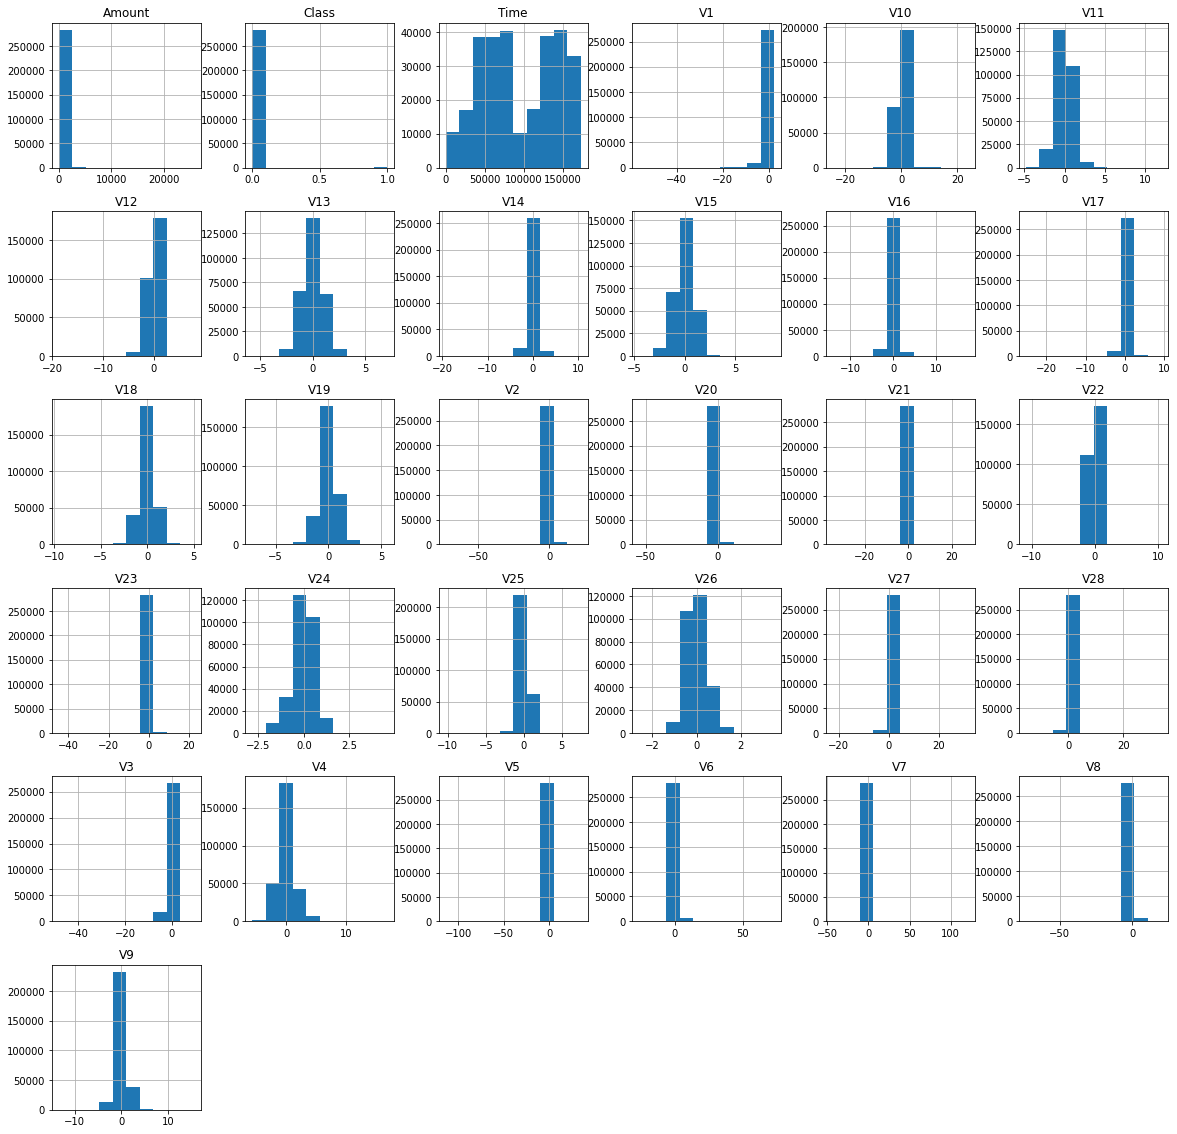

In [11]:
data.hist(figsize=(20,20))
plt.show()

In [12]:
X = data.drop(['Class'],axis=1)
y = data['Class']

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,classification_report,average_precision_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train.values.ravel())
log_pred=log_reg.predict(X_test)

print('Accuracy Score:{}'.format(accuracy_score(y_test, log_pred)))
print('f1 Score:{}'.format(f1_score(y_test, log_pred)))
print('Recall Score:{}'.format(recall_score(y_test,log_pred)))
print('Classification Report:')
print(classification_report(y_test,log_pred))
print('Average Precison-Recall Score:{}'.format(average_precision_score(y_test,log_pred)))

Accuracy Score:0.9992275552122467
f1 Score:0.7338709677419354
Recall Score:0.6453900709219859
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.85      0.65      0.73       141

    accuracy                           1.00     85443
   macro avg       0.92      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Average Precison-Recall Score:0.5494683298742462


In [15]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train.values.ravel())
svm_pred=svm.predict(X_test)

print('Accuracy Score:{}'.format(accuracy_score(y_test, svm_pred)))
print('f1 Score:{}'.format(f1_score(y_test, svm_pred)))
print('Recall Score:{}'.format(recall_score(y_test,svm_pred)))
print('Classification Report:')
print(classification_report(y_test,svm_pred))
print('Average Precison-Recall Score:{}'.format(average_precision_score(y_test,svm_pred)))

Accuracy Score:0.9994967405170698
f1 Score:0.8244897959183672
Recall Score:0.7163120567375887
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.97      0.72      0.82       141

    accuracy                           1.00     85443
   macro avg       0.99      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Average Precison-Recall Score:0.6961173573032954


In [16]:
from sklearn.tree import DecisionTreeClassifier
dst=DecisionTreeClassifier()
dst.fit(X_train,y_train)
dst_pred=dst.predict(X_test)

print('Accuracy Score:{}'.format(accuracy_score(y_test, dst_pred)))
print('f1 Score:{}'.format(f1_score(y_test, dst_pred)))
print('Recall Score:{}'.format(recall_score(y_test,dst_pred)))
print('Classification Report:')
print(classification_report(y_test,dst_pred))
print('Average Precison-Recall Score:{}'.format(average_precision_score(y_test,dst_pred)))

Accuracy Score:0.9992626663389628
f1 Score:0.7820069204152249
Recall Score:0.8014184397163121
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.76      0.80      0.78       141

    accuracy                           1.00     85443
   macro avg       0.88      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Average Precison-Recall Score:0.6122215125516692


In [17]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(n_estimators=100)
rmf.fit(X_train,y_train)
rmf_pred=rmf.predict(X_test)
print('Accuracy Score:{}'.format(accuracy_score(y_test, rmf_pred)))
print('f1 Score:{}'.format(f1_score(y_test, rmf_pred)))
print('Recall Score:{}'.format(recall_score(y_test,rmf_pred)))
print('Classification Report:')
print(classification_report(y_test,rmf_pred))
print('Average Precison-Recall Score:{}'.format(average_precision_score(y_test,rmf_pred)))

Accuracy Score:0.9996371850239341
f1 Score:0.8803088803088803
Recall Score:0.8085106382978723
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.97      0.81      0.88       141

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443

Average Precison-Recall Score:0.781419498157033


In [18]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=100)
abc.fit(X_train,y_train)
abc_pred=abc.predict(X_test)
print('Accuracy Score:{}'.format(accuracy_score(y_test, abc_pred)))
print('f1 Score:{}'.format(f1_score(y_test, abc_pred)))
print('Recall Score:{}'.format(recall_score(y_test,abc_pred)))
print('Classification Report:')
print(classification_report(y_test,abc_pred))
print('Average Precison-Recall Score:{}'.format(average_precision_score(y_test,abc_pred)))

Accuracy Score:0.9994850368081645
f1 Score:0.8345864661654135
Recall Score:0.7872340425531915
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.89      0.79      0.83       141

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Average Precison-Recall Score:0.6994149410543946


In [21]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
num_trees = 100
model = BaggingClassifier(base_estimator=dst, n_estimators=num_trees, random_state=7)
model.fit(X_train,y_train)
dstbc_pred=model.predict(X_test)
print('Accuracy Score:{}'.format(accuracy_score(y_test, dstbc_pred)))
print('f1 Score:{}'.format(f1_score(y_test, dstbc_pred)))
print('Recall Score:{}'.format(recall_score(y_test,dstbc_pred)))
print('Classification Report:')
print(classification_report(y_test,dstbc_pred))
print('Average Precison-Recall Score:{}'.format(average_precision_score(y_test,dstbc_pred)))

Accuracy Score:0.999602073897218
f1 Score:0.8692307692307694
Recall Score:0.8014184397163121
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.95      0.80      0.87       141

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Average Precison-Recall Score:0.7613384911429908
